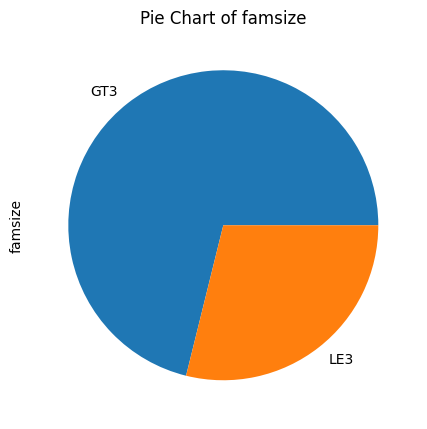

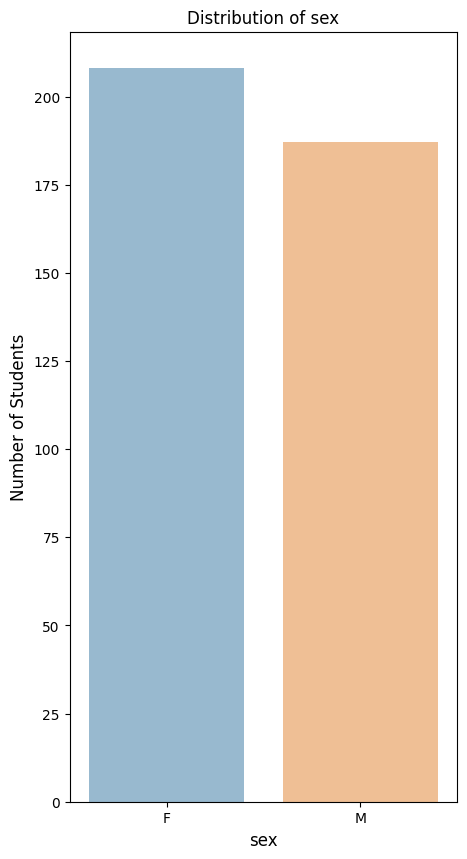

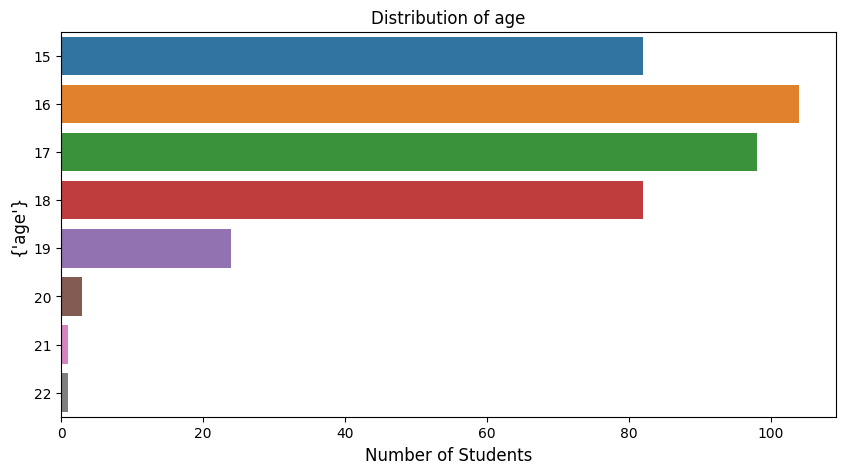

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


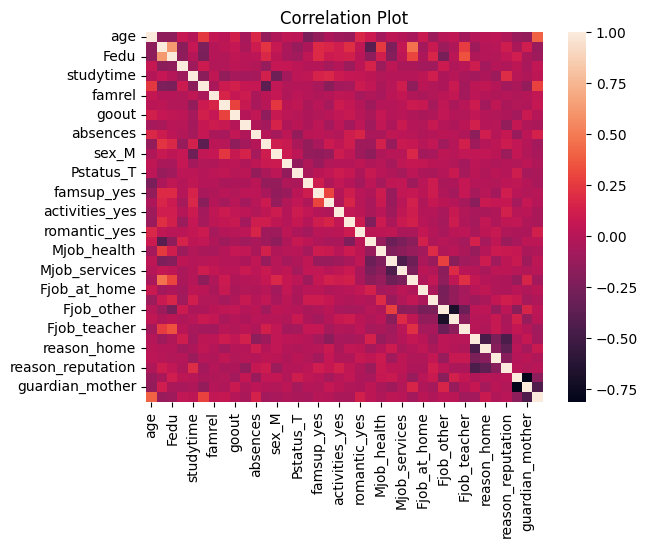

Coefficients [-2.31806104e-01  1.48440211e-01 -5.74409983e-02 -4.20400777e-01
  6.78577174e-01 -1.81498697e+00  7.15731030e-02  2.83190712e-01
 -5.86892312e-01 -1.47273418e-01  2.45419402e-02  1.09530841e+00
  4.95780386e-01 -5.95169214e-01 -1.51760735e+00 -9.44396270e-01
  3.15979089e-01 -2.69337152e-01  1.00049128e+00 -6.66442905e-01
 -8.32219518e+11 -8.32219518e+11 -8.32219518e+11 -8.32219518e+11
 -8.32219518e+11 -2.76290699e+11 -2.76290699e+11 -2.76290699e+11
 -2.76290699e+11 -2.76290699e+11  3.54920694e+11  3.54920694e+11
  3.54920694e+11  3.54920694e+11 -5.18449401e+12 -5.18449401e+12
 -5.18449401e+12]
Intercept: 5938083534104.254
R2: 0.13956477137937429
MSE: 9.989201415709308
RMSE: 3.1605697928869265
MAE: 2.491342240021009


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
# Importing the required libraries

# Storing the dataframe from the URL
student_data = pd.read_csv(
    'https://raw.githubusercontent.com/rickyli8529/Student-Performance-Prediction/main/student_data.csv')

# Checking and showing the dataset info and checking if there are any NaN's, commented it out so that the output only shows the graphs and model info
# student_data.columns
# student_data.shape
# student_data.info()
# student_data.isnull().sum()


# Creating a function that will create the correlation matrix based on the dataset that is passed through it
def correlation_matrix(data):
  sns.heatmap(data.corr())  # Using the heatmap function on the correlation of the passed dataset to plot the correlation matrix
  plt.title('Correlation Plot') # Creating the title of the correlation matrix
  plt.show()  # Show the correlation matrix

# Creating a function that will create the pie chart based on the dataset and the desired variable from the dataset that you want to make the pie chart of
def pie_chart(data, variable):
    pie_data = data[variable].value_counts()  # Counting values in the passed dataset of the passed variable
    plt.figure(figsize=(5, 10)) # Setting the size of the pie chart
    pie_data.plot.pie(title=f'Pie Chart of {variable}') # Plotting the pie chart and creating the title of the pie chart
    plt.show()  # Show the pie chart

# Creating a function that will create the vertical bar graph based on the dataset and the desired variable from the dataset that you want to make the bar graph of
def vertical_bar_chart(data, variable):
    bar_data = data[variable].value_counts()  # Counting values in the passed dataset of the passed variable
    plt.figure(figsize=(5, 10)) # Setting the size of the bar graph
    sns.barplot(x=bar_data.index, y=bar_data.values, alpha=0.5) # Plotting the bar graph and giving it the the x-axis and y-axis values
    plt.title(f'Distribution of {variable}')  # Creating the title of the bar graph
    plt.ylabel('Number of Students', fontsize=12) # Creating the y-axis label of the chart
    plt.xlabel(variable, fontsize=12) # Creating the x-axis label of the chart
    plt.show()  # Show the bar graph

# Creating a function that will create the horizontal bar graph based on the dataset and the desired variable from the dataset that you want to make the bar graph of
def horizontal_bar_chart(data, variable):
  bar_data = data[variable].value_counts()  # Counting values in the passed dataset of the passed variable
  plt.figure(figsize = (10, 5)) # Setting the size of the bar graph
  sns.barplot(x = bar_data.values, y = bar_data.index, alpha = 1, orient = 'h') # Plotting the bar graph and giving it the the x-axis and y-axis values
  plt.title(f'Distribution of {variable}')  # Creating the title of the bar graph
  plt.ylabel({variable}, fontsize = 12)  # Creating the y-axis label of the chart
  plt.xlabel('Number of Students', fontsize = 12) # Creating the x-axis label of the chart
  plt.show()  # Show the bar graph

# Creating a function that will preprocess the data by removing any unwanted variables columns from the dataset as well as encoding the columns that are non numeric
def data_preprocessing(data):
  data['mean_grade'] = data[['G1', 'G2', 'G3']].mean(axis=1)  # Creating the grade average column to be added to the dataset as this will be the target variable for the regression model
  remove_columns = ['school', 'address', 'nursery', 'higher', 'Dalc', 'Walc', 'G1', 'G2', 'G3'] # Creating a list of variable columns to remove from the dataset

  for column in remove_columns: # Creating a for loop to remove every single variable column from the list of columns we want to remove
    data = data.drop(column, axis=1)

  categorical_columns_2 = ['sex', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities',  # Creating a list of column variables that only have 2 options (this will be encoded so that its options are 1 or 0 for one column)
                            'internet', 'romantic']
  categorical_columns_3 = ['Mjob', 'Fjob', 'reason', 'guardian']  # Creating a list of column variables that have more than 2 options (this will be encoded so that each option has its own column)

  for column in categorical_columns_2:  # Creating a for loop that goes through each column in the categorical_columns_2 and encodes it to seperate the two options than remove the first option
      encoding_columns = pd.get_dummies(data[column], prefix=column, drop_first=True) # Seperating the options of the variable as new columns and adding the variable name to the beginning of the column name while dropping one of the two options
      data = data.drop(column, axis=1)  # Removing the original column that was in the dataset (example: 'sex' column is removed)
      data = data.join(encoding_columns)  # Adding the newly encoded variable column to the dataset (this means that 'sex' will be replaced with 'sex_M' for example)

  encoder = OneHotEncoder(sparse=False) # Using OneHotEncoder function to encode variables than have more than 2 options
  student_categorical3 = data[categorical_columns_3]

  student_encoded = encoder.fit_transform(student_categorical3) # Fitting and transforming the data

  columns = encoder.get_feature_names_out(categorical_columns_3)   # Convert output to a dataframe
  student_encoded_df = pd.DataFrame(student_encoded, columns=columns)

  data = data.drop(categorical_columns_3, axis=1) # Removing the original variables in the dataset that have more than 2 options (example is 'Mjob' is removed)
  data = pd.concat([data, student_encoded_df], axis=1)  # Joining the datasets together

  return data # Return the new preprocessed dataset

# Creating a function that will create the linear regression model and print out its R2, MSE, RMSE, MAE values
def linear_regression_model(data):
  X = data.drop(['mean_grade'], axis =1)  # Setting the X and y, where X is the features and y is the target variable
  y = data['mean_grade']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2) # Splitting the dataset into training and test sets with ratio 70/30

  LR = LinearRegression() # Loading the linear regression model

  LR.fit(X_train, y_train)

  y_pred = LR.predict(X_test) # Making predictions on the test data and testing model on test data essentially model evaluation

  coefficients = LR.coef_ # Calculating and printing the coefficients
  print(f'Coefficients {coefficients}')

  intercept = LR.intercept_ # Calculating and printing the intercept
  print(f'Intercept: {intercept}')

  r2 = r2_score(y_test, y_pred) # Calculating and printing the R2
  print(f'R2: {r2}')

  mse = mean_squared_error(y_test, y_pred) # Calculating and printing the MSE
  print(f'MSE: {mse}')

  rmse = mean_squared_error(y_test, y_pred, squared=False) # Calculating and printing the RMSE
  print(f'RMSE: {rmse}')

  mae = mean_absolute_error(y_test, y_pred) # Calculating and printing the MAE
  print(f'MAE: {mae}')
  return LR

pie_chart(student_data, 'famsize')  # Call the function to create a pie chart based on the family size variable in dataset
vertical_bar_chart(student_data, 'sex')  # Call the function to create a vertical bar chart based on the sex/gender variable in dataset
horizontal_bar_chart(student_data, 'age') # Call the function to create a horizontal bar chart based on the age variable in dataset

encoded_data = data_preprocessing(student_data) # Calling the function to preprocess the student_data dataset and then return that preprocessed dataset and put it into a variable
correlation_matrix(encoded_data) # Call the function to create a correlation matrix of the dataset
LR = linear_regression_model(encoded_data) # Calling the function to create and return the linear regression model and also print out its R2, MSE, RMSE, and MAE values

with open('student_performance.pkl', 'wb') as f:  # Exporting the model using pickle
    pickle.dump(LR, f)